<a href="https://colab.research.google.com/github/AdrZx/ADS2002-fyan0039/blob/main/W10_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

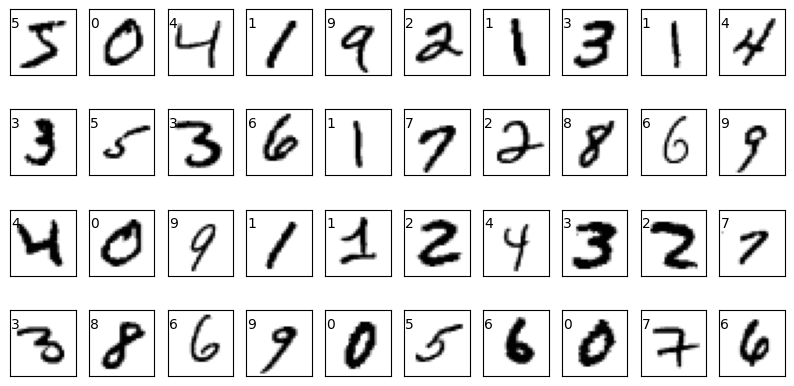

In [6]:
fig = plt.figure(figsize=(10,5)) # set up a figure of size 10 x 5

for i in range(40): # loop over the first 40 images
    # on a 4 x 10 grid add the next plot with no xticks or yticks
    ax = fig.add_subplot(4,10,i+1,xticks=[],yticks=[])
    # plot the image i of the digits and use binary colourmap
    ax.imshow(X_train_full[i], cmap=plt.cm.binary)
    ax.text(0,7,str(y_train_full[i])) # add the target value in the lower left corner

In [7]:
X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

Exercise 1

In [8]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

weights = model.get_weights();

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.save("KerasMnistModel.hd5")
!ls

KerasMnistModel.hd5  sample_data


In [12]:
opt = SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.set_weights(weights)
checkpoint_cb = ModelCheckpoint("KerasMnistModel.hd5")
history1 = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2,
                    callbacks=[checkpoint_cb]);

Epoch 1/10
1719/1719 - 9s - loss: 0.6070 - accuracy: 0.8457 - val_loss: 0.3033 - val_accuracy: 0.9172 - 9s/epoch - 5ms/step
Epoch 2/10
1719/1719 - 7s - loss: 0.2885 - accuracy: 0.9174 - val_loss: 0.2383 - val_accuracy: 0.9338 - 7s/epoch - 4ms/step
Epoch 3/10
1719/1719 - 8s - loss: 0.2357 - accuracy: 0.9329 - val_loss: 0.2036 - val_accuracy: 0.9426 - 8s/epoch - 4ms/step
Epoch 4/10
1719/1719 - 8s - loss: 0.2010 - accuracy: 0.9422 - val_loss: 0.1798 - val_accuracy: 0.9490 - 8s/epoch - 5ms/step
Epoch 5/10
1719/1719 - 7s - loss: 0.1757 - accuracy: 0.9500 - val_loss: 0.1575 - val_accuracy: 0.9568 - 7s/epoch - 4ms/step
Epoch 6/10
1719/1719 - 8s - loss: 0.1557 - accuracy: 0.9551 - val_loss: 0.1432 - val_accuracy: 0.9596 - 8s/epoch - 5ms/step
Epoch 7/10
1719/1719 - 8s - loss: 0.1399 - accuracy: 0.9598 - val_loss: 0.1328 - val_accuracy: 0.9634 - 8s/epoch - 4ms/step
Epoch 8/10
1719/1719 - 7s - loss: 0.1265 - accuracy: 0.9638 - val_loss: 0.1219 - val_accuracy: 0.9676 - 7s/epoch - 4ms/step
Epoch 9/

In [16]:
model.set_weights(weights)
checkpoint_cb = ModelCheckpoint("KerasMnistModel.hd5", monitor='val_accuracy',
                                save_best_only=True, verbose=1)
history2 = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid), verbose=0,
                    callbacks=[checkpoint_cb]);


Epoch 1: val_accuracy improved from -inf to 0.91380, saving model to KerasMnistModel.hd5

Epoch 2: val_accuracy improved from 0.91380 to 0.93420, saving model to KerasMnistModel.hd5

Epoch 3: val_accuracy improved from 0.93420 to 0.94260, saving model to KerasMnistModel.hd5

Epoch 4: val_accuracy improved from 0.94260 to 0.95140, saving model to KerasMnistModel.hd5

Epoch 5: val_accuracy improved from 0.95140 to 0.95560, saving model to KerasMnistModel.hd5

Epoch 6: val_accuracy improved from 0.95560 to 0.95880, saving model to KerasMnistModel.hd5

Epoch 7: val_accuracy improved from 0.95880 to 0.96120, saving model to KerasMnistModel.hd5

Epoch 8: val_accuracy improved from 0.96120 to 0.96640, saving model to KerasMnistModel.hd5

Epoch 9: val_accuracy improved from 0.96640 to 0.96760, saving model to KerasMnistModel.hd5

Epoch 10: val_accuracy improved from 0.96760 to 0.96920, saving model to KerasMnistModel.hd5

Epoch 11: val_accuracy improved from 0.96920 to 0.97080, saving model t

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

opt = SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.set_weights(weights)
checkpoint_cb = ModelCheckpoint("KerasMnistModel.hd5", monitor='val_accuracy',
                                save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5,min_delta=0.001,
                                  restore_best_weights=True)
history3 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid), verbose=2,
                    callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/40
1719/1719 - 8s - loss: 0.6058 - accuracy: 0.8452 - val_loss: 0.3063 - val_accuracy: 0.9140 - 8s/epoch - 5ms/step
Epoch 2/40
1719/1719 - 8s - loss: 0.2874 - accuracy: 0.9183 - val_loss: 0.2382 - val_accuracy: 0.9318 - 8s/epoch - 5ms/step
Epoch 3/40
1719/1719 - 7s - loss: 0.2355 - accuracy: 0.9332 - val_loss: 0.2024 - val_accuracy: 0.9456 - 7s/epoch - 4ms/step
Epoch 4/40
1719/1719 - 8s - loss: 0.2011 - accuracy: 0.9416 - val_loss: 0.1769 - val_accuracy: 0.9506 - 8s/epoch - 5ms/step
Epoch 5/40
1719/1719 - 7s - loss: 0.1755 - accuracy: 0.9493 - val_loss: 0.1567 - val_accuracy: 0.9562 - 7s/epoch - 4ms/step
Epoch 6/40
1719/1719 - 8s - loss: 0.1557 - accuracy: 0.9553 - val_loss: 0.1425 - val_accuracy: 0.9610 - 8s/epoch - 5ms/step
Epoch 7/40
1719/1719 - 7s - loss: 0.1395 - accuracy: 0.9596 - val_loss: 0.1322 - val_accuracy: 0.9630 - 7s/epoch - 4ms/step
Epoch 8/40
1719/1719 - 9s - loss: 0.1264 - accuracy: 0.9638 - val_loss: 0.1230 - val_accuracy: 0.9660 - 9s/epoch - 5ms/step
Epoch 9/

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

opt = SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.set_weights(weights)
checkpoint_cb = ModelCheckpoint("KerasMnistModel.hd5", monitor='val_accuracy',
                                save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5,min_delta=0.01,
                                  restore_best_weights=True)
history3 = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid), verbose=2,
                    callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/40
1719/1719 - 9s - loss: 0.6062 - accuracy: 0.8443 - val_loss: 0.3076 - val_accuracy: 0.9130 - 9s/epoch - 5ms/step
Epoch 2/40
1719/1719 - 7s - loss: 0.2883 - accuracy: 0.9177 - val_loss: 0.2397 - val_accuracy: 0.9330 - 7s/epoch - 4ms/step
Epoch 3/40
1719/1719 - 8s - loss: 0.2365 - accuracy: 0.9327 - val_loss: 0.2028 - val_accuracy: 0.9432 - 8s/epoch - 5ms/step
Epoch 4/40
1719/1719 - 7s - loss: 0.2013 - accuracy: 0.9427 - val_loss: 0.1766 - val_accuracy: 0.9498 - 7s/epoch - 4ms/step
Epoch 5/40
1719/1719 - 9s - loss: 0.1759 - accuracy: 0.9500 - val_loss: 0.1584 - val_accuracy: 0.9562 - 9s/epoch - 5ms/step
Epoch 6/40
1719/1719 - 8s - loss: 0.1559 - accuracy: 0.9559 - val_loss: 0.1437 - val_accuracy: 0.9616 - 8s/epoch - 5ms/step
Epoch 7/40
1719/1719 - 10s - loss: 0.1397 - accuracy: 0.9596 - val_loss: 0.1323 - val_accuracy: 0.9622 - 10s/epoch - 6ms/step
Epoch 8/40
1719/1719 - 10s - loss: 0.1263 - accuracy: 0.9640 - val_loss: 0.1248 - val_accuracy: 0.9664 - 10s/epoch - 6ms/step
Epoc

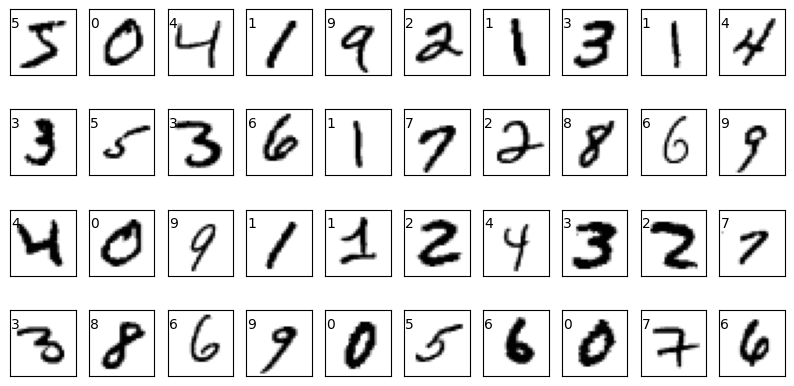

In [19]:
fig = plt.figure(figsize=(10,5)) # set up a figure of size 10 x 5

for i in range(40): # loop over the first 40 images
    # on a 4 x 10 grid add the next plot with no xticks or yticks
    ax = fig.add_subplot(4,10,i+1,xticks=[],yticks=[])
    # plot the image i of the digits and use binary colourmap
    ax.imshow(X_train_full[i], cmap=plt.cm.binary)
    ax.text(0,7,str(y_train_full[i])) # add the target value in the lower left corner

In [22]:
proba = model.predict(X_test)
y_test.shape

313/313 [==============================] - 3s 8ms/step


(10000,)

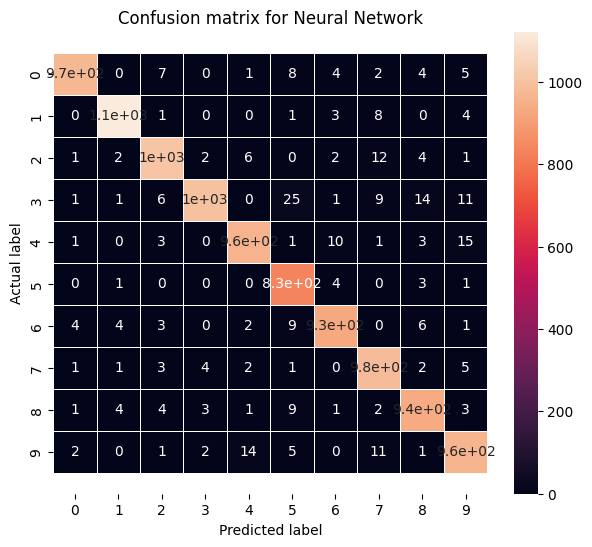

In [23]:
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Plots a sklearn confusion matrix with categories 'cats' for a classifier 'method'
    """
    # write the confusion matrix to a dataframe with row and column names as the categories,
    # which are already defined
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats)
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

# create a confusion matrix for our actual and predicted values
cnf_matrix = confusion_matrix(proba.argmax(axis=1), y_test)
plt_confusion_matrix(cnf_matrix, ['0','1','2','3','4','5','6','7','8','9'], 'Neural Network')

Exercise 2

In [24]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

weights = model.get_weights();

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
from keras.callbacks import ReduceLROnPlateau

opt = SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.set_weights(weights)
reducelr_cb = ReduceLROnPlateau(monitor='val_accuracy', factor=0.02, patience=4)
history4 = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid), verbose=2,
                    callbacks=[reducelr_cb]);

Epoch 1/50
1719/1719 - 7s - loss: 1.7580 - accuracy: 0.5657 - val_loss: 1.1801 - val_accuracy: 0.7710 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 2/50
1719/1719 - 8s - loss: 0.8865 - accuracy: 0.8117 - val_loss: 0.6715 - val_accuracy: 0.8474 - lr: 0.0010 - 8s/epoch - 5ms/step
Epoch 3/50
1719/1719 - 7s - loss: 0.5958 - accuracy: 0.8555 - val_loss: 0.5099 - val_accuracy: 0.8728 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 4/50
1719/1719 - 7s - loss: 0.4877 - accuracy: 0.8742 - val_loss: 0.4353 - val_accuracy: 0.8890 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 5/50
1719/1719 - 7s - loss: 0.4316 - accuracy: 0.8852 - val_loss: 0.3914 - val_accuracy: 0.9000 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 6/50
1719/1719 - 11s - loss: 0.3963 - accuracy: 0.8930 - val_loss: 0.3625 - val_accuracy: 0.9052 - lr: 0.0010 - 11s/epoch - 6ms/step
Epoch 7/50
1719/1719 - 7s - loss: 0.3715 - accuracy: 0.8983 - val_loss: 0.3422 - val_accuracy: 0.9084 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 8/50
1719/1719 - 8s - loss: 0.352

In [26]:
model.save("KerasMnistModel.hd5")
!ls

KerasMnistModel.hd5  sample_data


In [27]:
newmodel = keras.models.load_model("KerasMnistModel.hd5")
newmodel.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 21.8383 - accuracy: 0.9506


[21.838266372680664, 0.9506000280380249]

In [28]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid), verbose=2);

Epoch 1/50
1719/1719 - 7s - loss: 0.1553 - accuracy: 0.9566 - val_loss: 0.1548 - val_accuracy: 0.9574 - 7s/epoch - 4ms/step
Epoch 2/50
1719/1719 - 7s - loss: 0.1535 - accuracy: 0.9573 - val_loss: 0.1531 - val_accuracy: 0.9576 - 7s/epoch - 4ms/step
Epoch 3/50
1719/1719 - 8s - loss: 0.1517 - accuracy: 0.9575 - val_loss: 0.1517 - val_accuracy: 0.9586 - 8s/epoch - 5ms/step
Epoch 4/50
1719/1719 - 7s - loss: 0.1499 - accuracy: 0.9581 - val_loss: 0.1503 - val_accuracy: 0.9600 - 7s/epoch - 4ms/step
Epoch 5/50
1719/1719 - 8s - loss: 0.1481 - accuracy: 0.9586 - val_loss: 0.1490 - val_accuracy: 0.9588 - 8s/epoch - 5ms/step
Epoch 6/50
1719/1719 - 7s - loss: 0.1463 - accuracy: 0.9590 - val_loss: 0.1476 - val_accuracy: 0.9588 - 7s/epoch - 4ms/step
Epoch 7/50
1719/1719 - 8s - loss: 0.1446 - accuracy: 0.9598 - val_loss: 0.1463 - val_accuracy: 0.9596 - 8s/epoch - 4ms/step
Epoch 8/50
1719/1719 - 7s - loss: 0.1429 - accuracy: 0.9599 - val_loss: 0.1452 - val_accuracy: 0.9594 - 7s/epoch - 4ms/step
Epoch 9/

<Figure size 800x700 with 0 Axes>

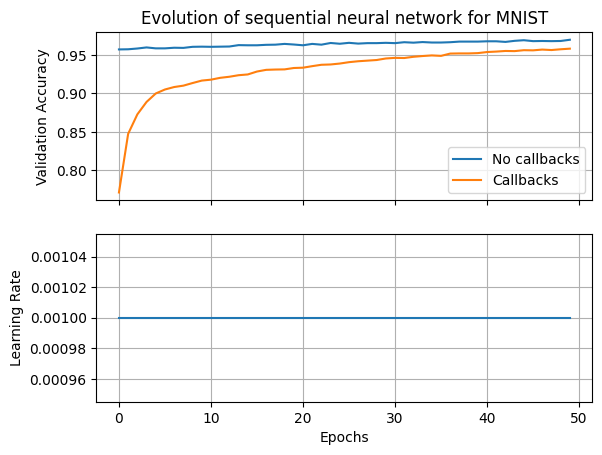

In [29]:
plt.figure(figsize=(8,7))

fig, axs = plt.subplots(2, 1)
axs[0].plot(history.history['val_accuracy'])
axs[0].plot(history4.history['val_accuracy'])
axs[0].set_ylabel('Validation Accuracy')
axs[0].xaxis.set_ticklabels([])

axs[0].legend(['No callbacks', 'Callbacks'], loc='lower right')
axs[0].grid(True)
axs[0].set_title('Evolution of sequential neural network for MNIST');

axs[1].plot(history4.history['lr'])
axs[1].set_ylabel('Learning Rate')
axs[1].set_xlabel('Epochs')
axs[1].grid(True);